In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
from datascience import *


# 5 Sept. 2018 Lesson 9

1) Download tips.csv

In [2]:
Tips = Table.read_table('tips.csv')
Tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


1 a) Find the mean tip by sex and overlay male tips and female tips.

In [3]:
Female = Tips.where('sex',are.equal_to('Female')).column('tip')
Male = Tips.where('sex',are.equal_to('Male')).column('tip')

FAV = np.average(Female)
MAV = np.average(Male)

print ('The average female tip is $',np.round(FAV,2))
print ('The average male tip is $',np.round(MAV,2))

The average female tip is $ 2.83
The average male tip is $ 3.09


Warner's solution

In [4]:
Tips.select('tip','sex').group('sex',np.mean)

sex,tip mean
Female,2.83345
Male,3.08962


In [5]:
len(Male)

157

C:\Users\C20John.Wirth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


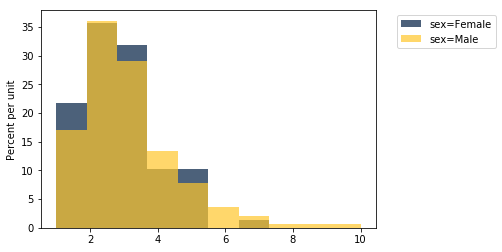

In [6]:
Tips.hist('tip',group='sex')

1 b) Repeat with time

C:\Users\C20John.Wirth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


The average dinner tip is $ 3.1
The average lunch tip is $ 2.73


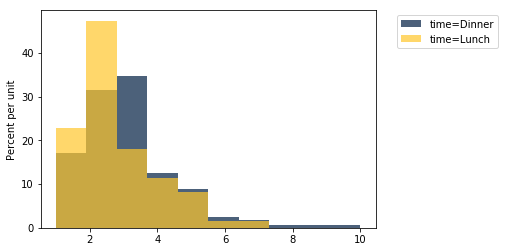

In [7]:
D = Tips.where('time',are.equal_to('Dinner')).column('tip')
L = Tips.where('time',are.equal_to('Lunch')).column('tip')

DAV = np.average(D)
LAV = np.average(L)

print ('The average dinner tip is $',np.round(DAV,2))
print ('The average lunch tip is $',np.round(LAV,2))

Tips.hist('tip',group='time')

2) Create a function weekday_to_num to convert the day to a number. Mon = 1 Sun = 7

In [8]:
def weekday_to_num(Day):
    "Returns a Number for each day of the week."
    if Day == 'Mon':
        x = 1
    elif Day == 'Tues':
        x = 2
    elif Day == 'Wed':
        x = 3
    elif Day == 'Thur':
        x = 4
    elif Day == 'Fri':
        x = 5
    elif Day == 'Sat':
        x = 6
    else:
        x = 7
    return x
    




 3) Apply this function to the day column and add the result as a new column.

Use the .apply method to apply a function to each argument of the array/column and return an array/column

In [9]:
Tips_Num = Tips.with_column('Weekday Num',Tips.apply(weekday_to_num,'day'))
Tips_Num
    

total_bill,tip,sex,smoker,day,time,size,Weekday Num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


lambda functions and .apply for the last questions.

4) Create a function to estimate the value of a tip based on the bill. There will be a window of values close to the bill that we will average and the bill value.

In [13]:
def est_tip(bill,window):
    return np.average(Tips.where('total_bill',are.between(bill - window,bill + window)).column('tip'))


5) Apply the function to the total bill column and include the result as a new column. Build a scatterplot showing the predicted and actual tip amount.

In [17]:
Tips_With_Est = Tips.with_column('Estimated Tip',Tips.apply(est_tip,'total_bill',1))
Tips_With_Est

total_bill,tip,sex,smoker,day,time,size,Estimated Tip
16.99,1.01,Female,No,Sun,Dinner,2,2.80618
10.34,1.66,Male,No,Sun,Dinner,3,1.90276
21.01,3.5,Male,No,Sun,Dinner,3,3.19508
23.68,3.31,Male,No,Sun,Dinner,2,3.57681
24.59,3.61,Female,No,Sun,Dinner,4,3.6575
25.29,4.71,Male,No,Sun,Dinner,4,3.67526
8.77,2,Male,No,Sun,Dinner,2,1.86857
26.88,3.12,Male,No,Sun,Dinner,4,3.72424
15.04,1.96,Male,No,Sun,Dinner,2,2.54036
14.78,3.23,Male,No,Sun,Dinner,2,2.46231


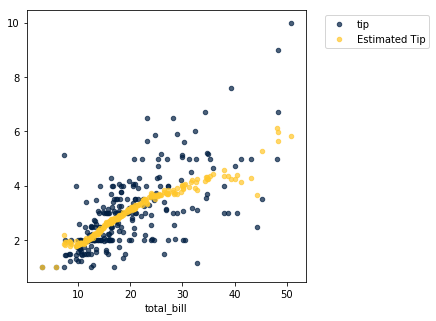

In [27]:
Tips_Plot = Tips_With_Est.select('total_bill','tip','Estimated Tip')
Tips_Plot.scatter('total_bill')
